<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/swayista/DM_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings(action = "ignore")


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [ ]:
df.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [ ]:
df.shape

(1109383, 28)

In [ ]:
df.dtypes


authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

In [ ]:
df.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      747261
for-ages              1033390
format                   6622
id                          0
illustrations-note     752907
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(28)

,missing_percentage
index-date,100.000000
publication-place,100.000000
for-ages,93.149976
edition,83.521110
imprint,74.820779
illustrations-note,67.867184
edition-statement,67.358252
bestsellers-rank,42.081229
rating-avg,39.673404
rating-count,39.673404


In [ ]:
unique_authors_count = df['authors'].explode().nunique()
print("Count of unique authors:", unique_authors_count)


Count of unique authors: 564646


In [ ]:
unique_bestsellers_count = df['bestsellers-rank'].nunique()
print("Count of unique bestsellers-rank:", unique_bestsellers_count)


Count of unique bestsellers-rank: 531931


# Clean the authors missing values

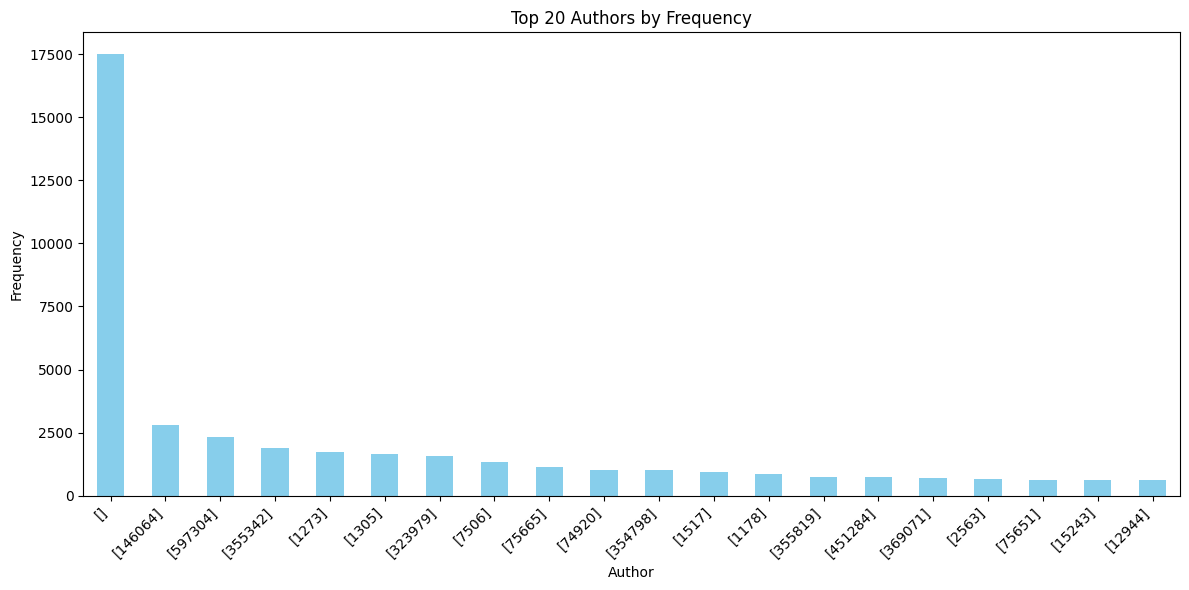

In [ ]:
# Calculate the frequency counts of authors
author_counts = df['authors'].explode().value_counts()

# Sort the authors by count in descending order
author_counts_sorted = author_counts.sort_values(ascending=False)

# Get the top 20 authors
top_20_authors = author_counts_sorted.head(20)

# Create a bar plot for the top 20 authors
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Frequency')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [ ]:
count_1273 = df['authors'].apply(lambda x: '[1273]' in x).sum()
print("Occurrences of [1273] in the authors column:", count_1273)


Occurrences of [1273] in the authors column: 1742


# Should bestseller-rank be unique or is it fine to get repeated.

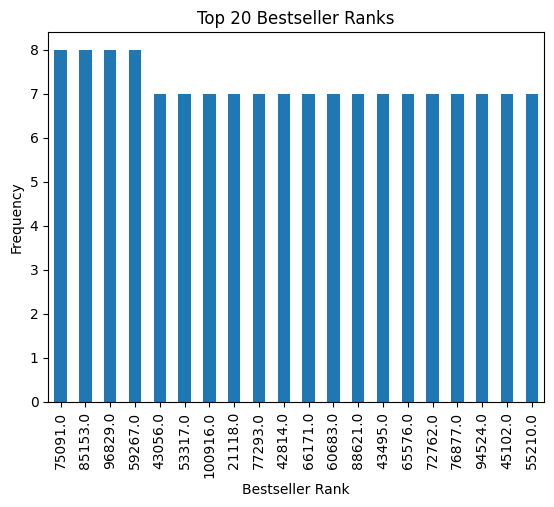

In [ ]:
top_20_bestseller_ranks = df['bestsellers-rank'].value_counts().head(20)

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks.plot(kind='bar')
plt.title('Top 20 Bestseller Ranks')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.show()


# Top 20 rank

In [ ]:
df.nsmallest(20,['bestsellers-rank'])

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
96189,[74164],1001.0,"[214, 215, 233, 238, 654, 768, 2782]",Brian Pennie shouldn't be alive today. His dru...,152.00,234.00,22.00,NaN,NaN,NaN,...,717186350,9780717186358,en,2020-03-20 00:00:00,NaN,4.59,85.0,Bonus Time : A true story of surviving the wor...,/Bonus-Time-Brian-Pennie/9780717186358,384.00
695733,[73321],1001.0,"[3223, 3225, 2819]","Anam Cara is a rare synthesis of philosophy, p...",121.67,217.17,15.24,NaN,NaN,NaN,...,006092943X,9780060929435,en,1998-12-31 00:00:00,NaN,4.22,7569.0,Anam Cara : A Book of Celtic Wisdom,/Anam-Cara-John-ODonohue/9780060929435,190.51
629379,"[391981, 7506]",1002.0,"[2525, 2529]",Visit Bob and Ginger the guinea pigs in their ...,204.00,262.00,10.00,NaN,NaN,NaN,...,241453100,9780241453100,en,2021-02-04 00:00:00,NaN,NaN,NaN,Guinea Pigs Go Gardening,/Guinea-Pigs-Go-Gardening-DK/9780241453100,356.00
95978,[74055],1005.0,"[285, 3121, 2813]",A celebration of hope. An encounter with grace...,133.00,190.00,20.00,NaN,NaN,NaN,...,310454077,9780310454076,en,2020-02-20 00:00:00,NaN,4.30,1625.0,All Along You Were Blooming : Thoughts for Bou...,/All-Along-You-Were-Blooming-Morgan-Harper-Nic...,385.00
489480,"[888, 322742, 210991]",1006.0,"[215, 334, 2778]",The No. 1 Sunday Times and internationally bes...,131.00,197.00,15.00,NaN,NaN,NaN,...,1444776770,9781444776775,en,2014-06-19 00:00:00,NaN,3.81,45384.0,The Reason I Jump: one boy's voice from the si...,/Reason-I-Jump-one-boys-voice-from-silence-aut...,172.00
753116,"[61001, 228590]",1007.0,"[29, 218]",'Must surely be the definitive life of Francis...,159.00,240.00,60.00,NaN,NaN,NaN,...,7298412,9780007298419,en,2021-01-21 00:00:00,NaN,4.00,1.0,Francis Bacon : Revelations,/Francis-Bacon-Mark-Stevens/9780007298419,1340.00
417696,[22150],1008.0,"[334, 352, 2626]","Winner of the Hugo, Nebula, and Philip K. Dick...",108.00,175.00,20.32,NaN,Reissue,NaN,...,441569595,9780441569595,en,2003-01-01 00:00:00,NaN,3.90,268740.0,Neuromancer,/Neuromancer-William-Gibson/9780441569595,143.00
573906,[100827],1008.0,[2488],Follow Chaol on his sweeping journey to a dist...,129.00,198.00,46.00,NaN,NaN,NaN,...,1408887975,9781408887974,en,2018-04-19 00:00:00,NaN,4.34,145621.0,Tower of Dawn,/Tower-Dawn-Sarah-J-Maas/9781408887974,456.00
881532,[353438],1009.0,"[44, 2645]",Galway artist Roisin Cure presents snapshots o...,226.06,241.30,22.86,NaN,NaN,NaN,...,1782189084,9781782189084,en,2019-06-30 00:00:00,NaN,4.80,5.0,An Urban Sketcher's Galway,/Urban-Sketchers-Galway-Roisin-Cure/9781782189084,997.90
417513,[11574],1010.0,"[334, 343, 362, 363]",Following on from the Sunday Times number one ...,163.00,242.00,53.00,NaN,NaN,NaN,...,1509806873,9781509806874,en,2021-01-21 00:00:00,NaN,4.30,436.0,The City of Tears,/City-Tears-Kate-Mosse/9781509806874,812.00


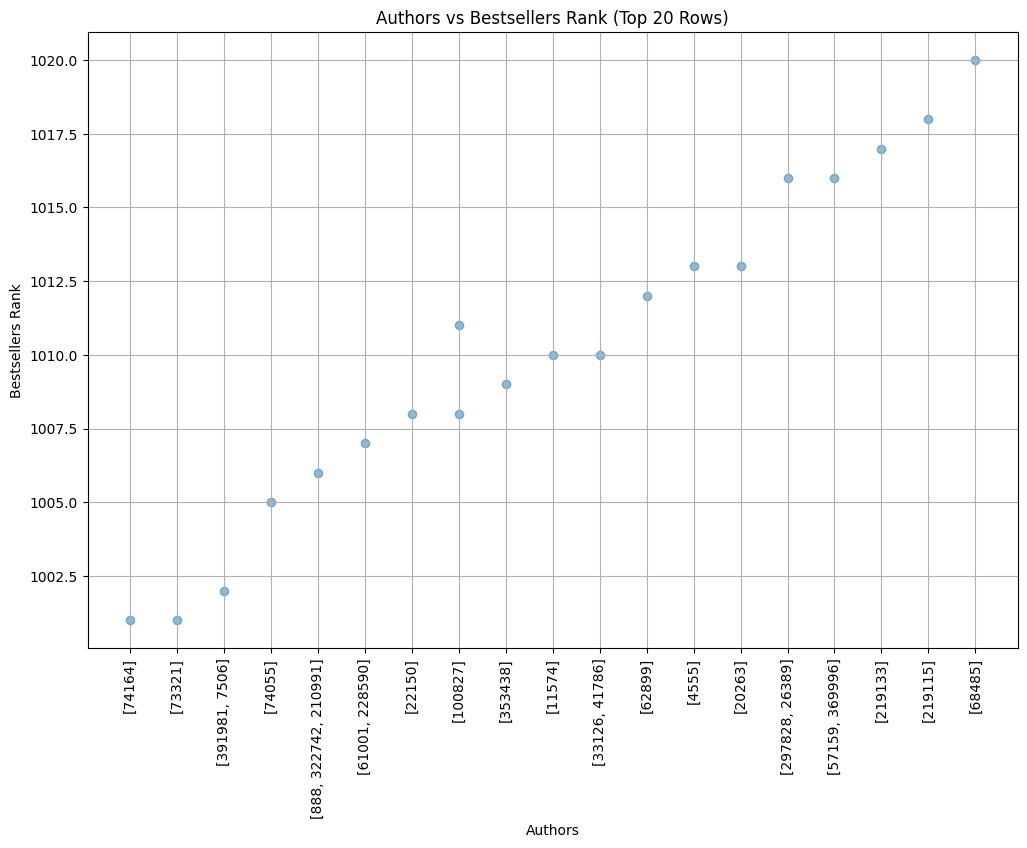

In [ ]:
import matplotlib.pyplot as plt

# Extracting the data for the top 20 rows
top_20_data = df.iloc[[96189, 695733, 629379, 95978, 489480, 753116, 417696, 573906, 881532, 417513, 539823, 648666, 235742, 417229, 417396, 648885, 649654, 353569, 306689, 95281]]

# Extracting the authors and bestsellers-rank
authors = top_20_data['authors']
bestsellers_rank = top_20_data['bestsellers-rank']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(authors, bestsellers_rank, alpha=0.5)
plt.title('Authors vs Bestsellers Rank (Top 20 Rows)')
plt.xlabel('Authors')
plt.ylabel('Bestsellers Rank')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()


PydanticImportError: ignored

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [ ]:
ProfileReport(df, title='Pandas Profiling report of "dataset"', html={'style': {'full_width': True}})


NameError: ignored

# Only 1 author

In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/dataset.csv")   # dataset_csv
df2 = pd.read_csv('/content/drive/MyDrive/authors.csv')   # authors_csv
df3 = pd.read_csv('/content/drive/MyDrive/categories.csv')  # categories_csv


In [7]:


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


df1.head()



,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,1.0,9781844547371,NaN,1dc4e79575474ac775cdfe9840bdfb94,full/5/9/8/598ae8f736c99bc423352887d406d2b2f94...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,1.0,9780571308996,NaN,bc593914f06e1021be9977114ea2a28f,full/1/a/f/1af9cad94dfe897b4423993c78b137bee40...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [8]:
df2.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [8]:
df1['authors'] = df1['authors'].str.replace(r'
', '', regex=True)

df1['categories'] = df1['categories'].str.replace(r'
', '', regex=True)


SyntaxError: ignored

In [9]:


df2['author_id'] = df2['author_id'].astype(str)

df3['category_id'] = df3['category_id'].astype(str)

merged_df = df1.merge(df2, left_on='authors', right_on='author_id', how='left')

# merged_df = merged_df.merge(df3, left_on='categories', right_on='category_id', how='left')



author_1 = merged_df[merged_df['authors'].str.count(',') == 0]


author_1.head(20)



,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight,author_id,author_name
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.00,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00,NaN,NaN
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.00,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00,NaN,NaN
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.00,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00,NaN,NaN
8,[14],7004.0,"[3223, 700, 1521, 2820]",For the millions of Americans who want spiritu...,140.0,213.0,15.00,NaN,Reprint,NaN,1.0,9781451636024,NaN,8242901f9c8358e80b64f16a9b76df0b,full/f/4/e/f4e5b422024491be842709726380c7a4c1c...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1451636024,9781451636024,en,2015-06-16 00:00:00,NaN,3.92,33806.0,Waking Up : A Guide to Spirituality Without Re...,/Waking-Up-Sam-Harris/9781451636024,181.00,NaN,NaN
9,[15],66137.0,"[37, 46, 2784, 2942, 2980, 2912, 3385]","Part of the Art of Coloring series, which has ...",193.0,272.0,15.24,NaN,NaN,NaN,1.0,9781484788899,"1 Illustrations, unspecified",9f620cba34acf4ae6c717d0dd62c3aa4,full/8/0/0/800b21ffb4eddce9c7753889798e2affad0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1484788893,9781484788899,en,2017-05-04 00:00:00,NaN,4.20,5.0,Art Of Coloring: Muppets,/Art-Coloring-Muppets-Disney-Book-Group/978148...,476.27,NaN,NaN
10,[16],318003.0,"[2859, 2980, 2983]","When a young boy goes missing, a small town un...",148.0,198.0,16.00,NaN,NaN,NaN,2.0,9781409173359,NaN,870b29e7119cdf80beeb5aa626d019ce,full/3/a/4/3a444f0d8cb2b4ac55938ea31b5f76f151b...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Trapeze,NaN,1409173356,9781409173359,en,2017-10-19 00:00:00,NaN,3.12,24.0,Stranger Fillings : Edible recipes to turn you...,/Stranger-Fillings-Muffin-Brothers/9781409173359,384.00,NaN,NaN
11,[17],76405.0,"[1532, 1600, 2820]",NaN,151.0,230.0,23.00,NaN,NaN,NaN,1.0,9781401938697,NaN,448dbd5af60b3d681afc1888165dd9ca,full/8/3/9/8398ea46e10276eea120afed50d468472eb...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1401938698,9781401938697,NaN,2015-08-26 00:00:00,NaN,4.14,12083.0,Biology of Belief: 10th Anniversary Edition,/Biology-Belief-10th-Anniversary-Edition-Bruce...,405.00,NaN,NaN
12,[18],509443.0,"[2980, 2452, 2540]",Olivia believes in making every day an adventu...,89.0,91.0,61.00,NaN,NaN,6-8,1.0,9780762451012,colour illustrations throughout,e6bf28647da12290ba99ce38cd6d3085,full/c/c/6/cc6dffe99fd691e7cc7605392ab02218185...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Running Press Miniature Editions,NaN,762451017,9780762451012,en,2013-10-01 00:00:00,NaN,NaN,NaN,Olivia Dress Me Up : A Magnetic Kit,/Olivia-Dress-Me-Up-Running-Press/9780762451012,84.00,NaN

In [10]:
author_1.shape


(771607, 30)

In [25]:
!pip install ydata-profiling

In [21]:
pip install --upgrade typing-extensions


In [26]:
from ydata_profiling import ProfileReport as pp

ImportError: ignored

In [19]:
ProfileReport(df, title='Pandas Profiling report of "dataset"', html={'style': {'full_width': True}})


NameError: ignored

In [14]:
author_1.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
author_id              object
author_name            object
dtype: object

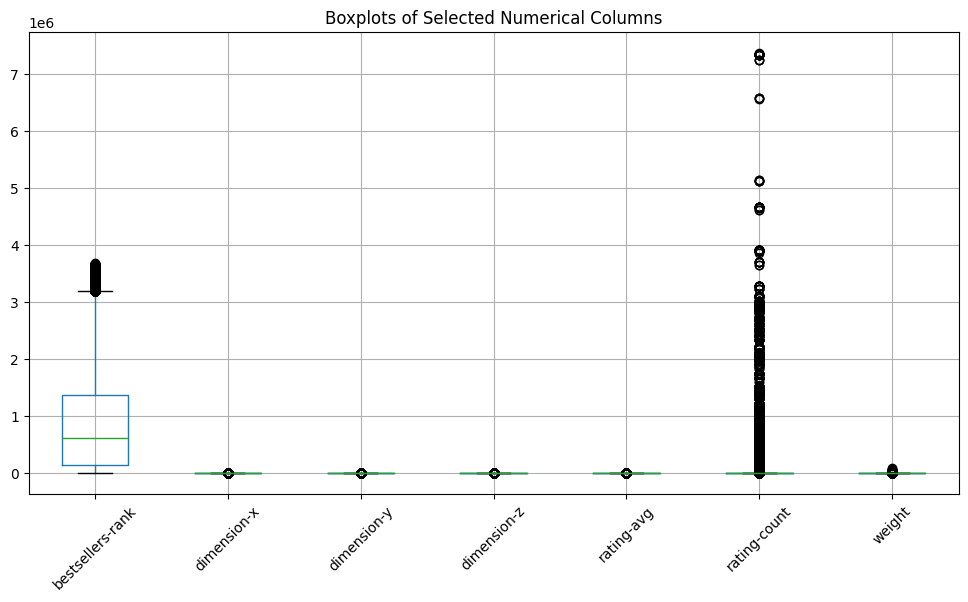

In [16]:
import matplotlib.pyplot as plt

# Select the columns you want for the boxplot
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for the selected columns
author_1[selected_columns].boxplot()
plt.title('Boxplots of Selected Numerical Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


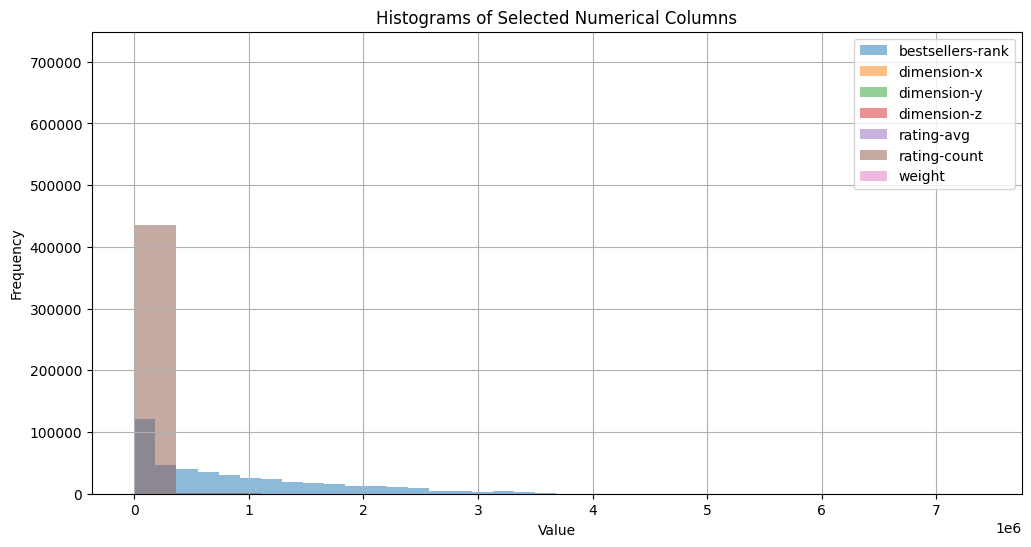

In [17]:
import matplotlib.pyplot as plt

# Select the columns you want for the histogram
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create histograms for the selected columns
for column in selected_columns:
    plt.hist(author_1[column], bins=20, alpha=0.5, label=column)

plt.title('Histograms of Selected Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


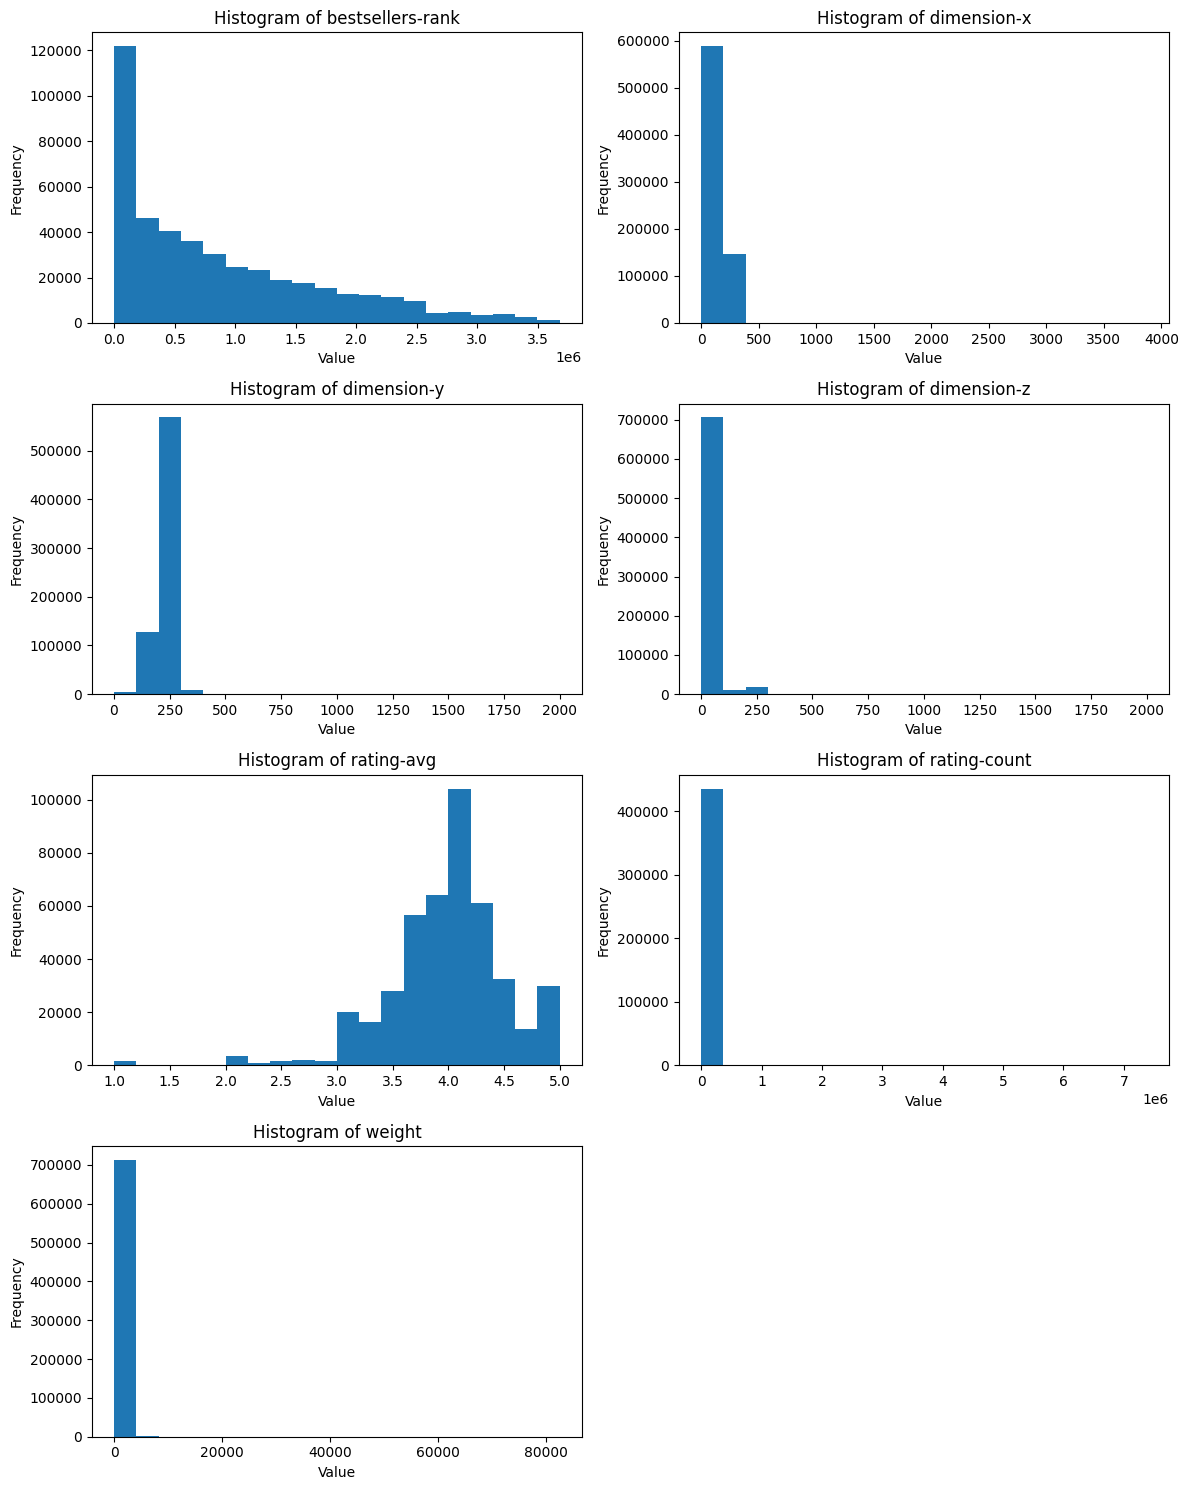

In [18]:
import matplotlib.pyplot as plt

# Select the columns you want for the histograms
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 15))

# Create histograms for each selected column separately
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot layout as needed
    plt.hist(author_1[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
percent_missing = author_1.isnull().sum() * 100 / len(author_1)
missing_value_author_1 = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_author_1.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_author_1.head(28)

,missing_percentage
author_name,100.000000
publication-place,100.000000
index-date,100.000000
author_id,100.000000
for-ages,93.454699
edition,89.960952
imprint,75.594700
edition-statement,74.555311
illustrations-note,68.699740
rating-count,43.153315


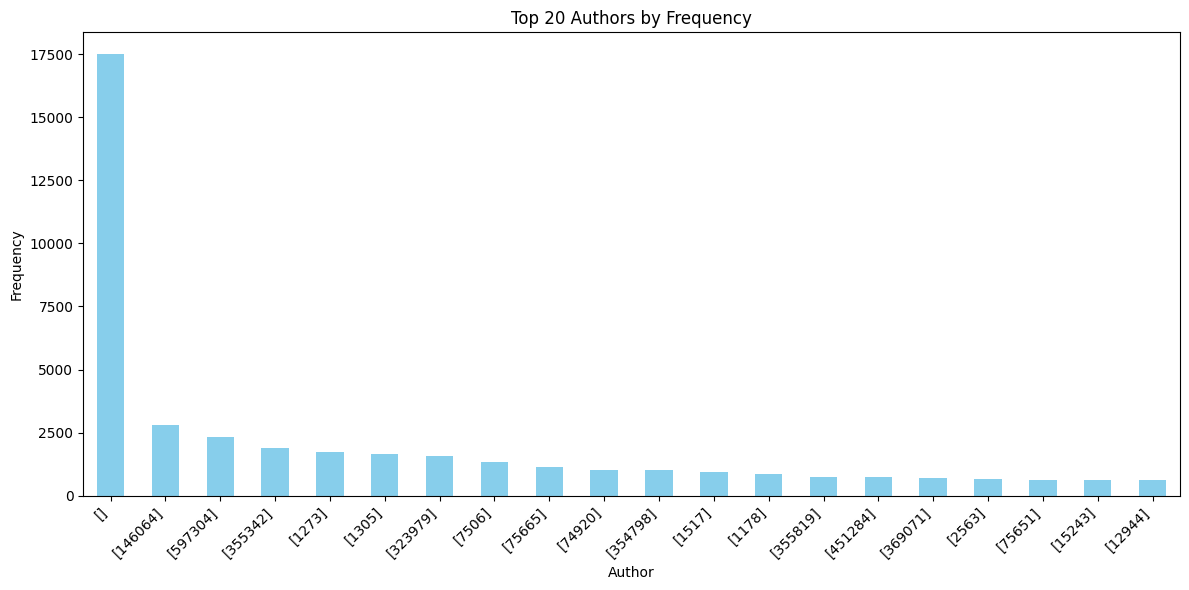

In [29]:
# Calculate the frequency counts of authors
author_counts = author_1['authors'].explode().value_counts()

# Sort the authors by count in descending order
author_counts_sorted = author_counts.sort_values(ascending=False)

# Get the top 20 authors
top_20_authors = author_counts_sorted.head(20)

# Create a bar plot for the top 20 authors
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Frequency')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [30]:
count_1273 = author_1['authors'].apply(lambda x: '[1273]' in x).sum()
print("Occurrences of [1273] in the authors column:", count_1273)


Occurrences of [1273] in the authors column: 1742


In [42]:
unique_bestseller_rank = author_1['bestsellers-rank'].nunique()
print(unique_bestseller_rank)


381481


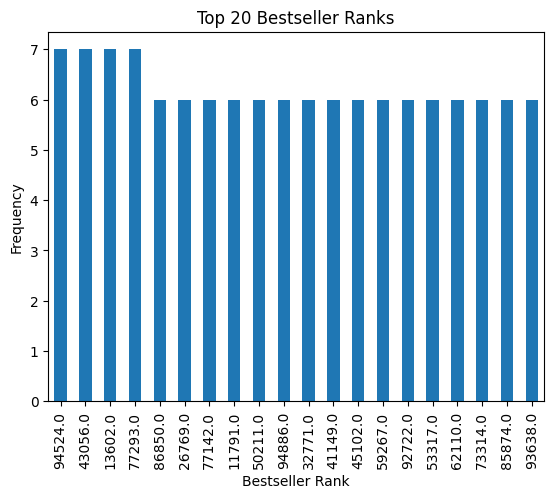

In [31]:
top_20_bestseller_ranks = author_1['bestsellers-rank'].value_counts().head(20)

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks.plot(kind='bar')
plt.title('Top 20 Bestseller Ranks')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks = author_1['bestsellers-rank'].value_counts().head(20)

# Group by 'bestsellers-rank' and 'authors' and count the occurrences
rank_and_author_counts = author_1.groupby(['bestsellers-rank', 'authors']).size().reset_index(name='counts')

# Pivot the data to have 'authors' as columns and 'bestsellers-rank' as rows
pivot_data = rank_and_author_counts.pivot(index='bestsellers-rank', columns='authors', values='counts')

# Create a bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 20 Bestseller Ranks by Authors')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.legend(title='Authors')
plt.show()


NameError: ignored

In [32]:
author_1.nsmallest(20,['bestsellers-rank'])

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight,author_id,author_name
96189,[74164],1001.0,"[214, 215, 233, 238, 654, 768, 2782]",Brian Pennie shouldn't be alive today. His dru...,152.00,234.00,22.00,NaN,NaN,NaN,1.0,9780717186358,NaN,c94f363465bfed260b5816b7ded0e9a2,full/c/6/6/c66a5448b735fc3c34972a4039131cd53b5...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Gill Books,NaN,717186350,9780717186358,en,2020-03-20 00:00:00,NaN,4.59,85.0,Bonus Time : A true story of surviving the wor...,/Bonus-Time-Brian-Pennie/9780717186358,384.00,NaN,NaN
695733,[73321],1001.0,"[3223, 3225, 2819]","Anam Cara is a rare synthesis of philosophy, p...",121.67,217.17,15.24,NaN,NaN,NaN,1.0,9780060929435,NaN,68a711b78a15f4ed0fad688e942a1ab5,full/e/4/7/e4788ed7aeb5e0e211dc00ee8e6ed52d336...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperPaperbacks,NaN,006092943X,9780060929435,en,1998-12-31 00:00:00,NaN,4.22,7569.0,Anam Cara : A Book of Celtic Wisdom,/Anam-Cara-John-ODonohue/9780060929435,190.51,NaN,NaN
95978,[74055],1005.0,"[285, 3121, 2813]",A celebration of hope. An encounter with grace...,133.00,190.00,20.00,NaN,NaN,NaN,2.0,9780310454076,NaN,bb10a229937b5959ea94adc439a038ec,full/9/b/2/9b2bd37802b94ee4d52426c5abefbcec5f6...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,310454077,9780310454076,en,2020-02-20 00:00:00,NaN,4.30,1625.0,All Along You Were Blooming : Thoughts for Bou...,/All-Along-You-Were-Blooming-Morgan-Harper-Nic...,385.00,NaN,NaN
417696,[22150],1008.0,"[334, 352, 2626]","Winner of the Hugo, Nebula, and Philip K. Dick...",108.00,175.00,20.32,NaN,Reissue,NaN,1.0,9780441569595,NaN,ae8b4f8ce62dee298f9ee5318d63b445,full/2/7/e/27eddca55ebce1aa182acfa2fad5f96c336...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,441569595,9780441569595,en,2003-01-01 00:00:00,NaN,3.90,268740.0,Neuromancer,/Neuromancer-William-Gibson/9780441569595,143.00,NaN,NaN
573906,[100827],1008.0,[2488],Follow Chaol on his sweeping journey to a dist...,129.00,198.00,46.00,NaN,NaN,NaN,1.0,9781408887974,NaN,446d66fc0282b19a3aea5d367af30cba,full/3/a/1/3a1e53b74f04e9aa5c861504aa489ee6cf0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Bloomsbury YA,NaN,1408887975,9781408887974,en,2018-04-19 00:00:00,NaN,4.34,145621.0,Tower of Dawn,/Tower-Dawn-Sarah-J-Maas/9781408887974,456.00,NaN,NaN
881532,[353438],1009.0,"[44, 2645]",Galway artist Roisin Cure presents snapshots o...,226.06,241.30,22.86,NaN,NaN,NaN,2.0,9781782189084,NaN,65b280899d3c22dbab5d5d475d555615,full/5/e/5/5e5f0c6fdbc11091cdaf2d80af662eb2170...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Currach Press,NaN,1782189084,9781782189084,en,2019-06-30 00:00:00,NaN,4.80,5.0,An Urban Sketcher's Galway,/Urban-Sketchers-Galway-Roisin-Cure/9781782189084,997.90,NaN,NaN
417513,[11574],1010.0,"[334, 343, 362, 363]",Following on from the Sunday Times number one ...,163.00,242.00,53.00,NaN,NaN,NaN,2.0,9781509806874,NaN,11520c0d614d99ceeca961cbae0cff49,full/6/1/4/6147f24127a4afc16bdb5ae2258dfc0742f...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mantle,NaN,1509806873,9781509806874,en,2021-01-21 00:00:00,NaN,4.30,436.0,The City of Tears,/City-Tears-Kate-Mosse/9781509806874,812.00,NaN,NaN
648666,[100827],1011.0,"[2488, 2495, 2498]",Find out where the Throne of Glass journey beg...,129.00,198.00,32.00,NaN,NaN,12-17,1.0,9781408851982,NaN,7e13e162ea858ef2e8bf28ef4e129306,full/6/f/1/6f1f7655eca3e749ede08818bbdea53d122...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Bloomsbury YA,NaN,1408851989,9781408851982,en,2015-03-13 00:00:00,NaN,4.37,149874.0,The Assassin's Blade : The Throne of Glass Nov...,/Assassins-Blade-Sarah-J-Maas/9781408851982,322.00,NaN,NaN
235742,[62899],1012.0,"[228, 719, 780, 1300, 1456, 1602, 2840]",The No.1 New York Times Be

In [37]:
author_1.nsmallest(20, 'bestsellers-rank')[['authors', 'bestsellers-rank', 'rating-avg', 'imprint', 'title']]


,authors,bestsellers-rank,rating-avg,imprint,title
96189,[74164],1001.0,4.59,Gill Books,Bonus Time : A true story of surviving the wor...
695733,[73321],1001.0,4.22,HarperPaperbacks,Anam Cara : A Book of Celtic Wisdom
95978,[74055],1005.0,4.30,NaN,All Along You Were Blooming : Thoughts for Bou...
417696,[22150],1008.0,3.90,NaN,Neuromancer
573906,[100827],1008.0,4.34,Bloomsbury YA,Tower of Dawn
881532,[353438],1009.0,4.80,Currach Press,An Urban Sketcher's Galway
417513,[11574],1010.0,4.30,Mantle,The City of Tears
648666,[100827],1011.0,4.37,Bloomsbury YA,The Assassin's Blade : The Throne of Glass Nov...
235742,[62899],1012.0,4.19,NaN,How to Change Your Mind : The New Science of P...
417229,[4555],1013.0,4.34,NaN,The Stand


In [38]:
author_1.nlargest(20, 'rating-avg')[['authors', 'bestsellers-rank', 'rating-avg', 'imprint', 'title']]


,authors,bestsellers-rank,rating-avg,imprint,title
99,[129],NaN,5.0,NaN,Cycling down The Street
118,[160],33504.0,5.0,NaN,Using Psychology in the Classroom
206,[273],67512.0,5.0,Bloomsbury Education,100 Ideas for Secondary Teachers: Outstanding ...
235,[314],1645893.0,5.0,NaN,Vegan Cookbooks : 70 of the Best Ever Healthy ...
281,[396],NaN,5.0,NaN,The Keto Vegetarian : 101 Delicious Low-Carb P...
301,[426],NaN,5.0,NaN,Dr. Food Approved Cookbook : Simply Delicious ...
307,[435],700859.0,5.0,NaN,A Reflective Practitioner's Guide to (Mis)Adve...
358,[515],836250.0,5.0,NaN,Classroom Yoga Breaks : Brief Exercises to Cre...
367,[533],NaN,5.0,NaN,Type 2 Diabetes Crock Pot Cookbook 2020 : 200 ...
390,[563],898956.0,5.0,NaN,Words That Win : How to win the debates that m...


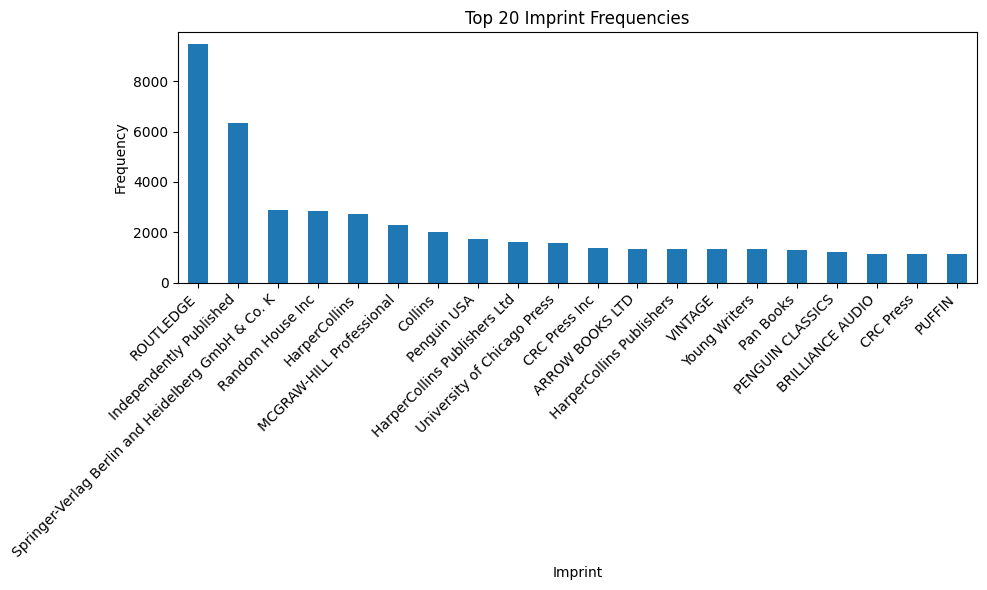

In [39]:
# Assuming your DataFrame is named df
imprint_counts = author_1['imprint'].value_counts().head(20)  # Get the top 20 imprint frequencies

# Create a bar plot
plt.figure(figsize=(10, 6))
imprint_counts.plot(kind='bar')
plt.title('Top 20 Imprint Frequencies')
plt.xlabel('Imprint')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()